# [LAB 06] 8. 데이터 간 관계 시각화 (2) - Regplot, Lmplot, Pairplot

Regplot
- 장점: 산점도 그래프랑 회귀선을 한꺼번에 표시할 때 편함
- 단점: 복수 변수 ㄴㄴ 단일 변수만 분석가능 (hue 파라미터 지원 x)

Lmplot
- 장점: hue 파라미터를 지원함 (regplot과의 차이점)
  - 범주형 변수의 가짓수 다 한 그래프에 시각화 가능
        -(ex. 우리나라의 지역(범주형 변수): (multi hues) 서울, 경기, 강원, 대전,..)
  -  이때 각 hue들을 subplot이라 지칭함
  - 각각의 subplot의 조건에 따라 행, 열로 구분 필요
- 단점: 원래 시각화 과정의 1) 그래프 초기화 코드에서 설정한 'fig, ax'의 기본값을 쓸 수 없음 (subplot의 행렬 구분으로 대체됨)

Pairplot
- lmplot의 각각의 행열 지정 귀찮음을 해결하기 위해 만들어짐
- 장점: 모든 변수에 대한 교차분석
- 단점: 모든 경우 다 돌리니까 개~느림 -> 그래프 도출까지 시간 겁나 걸림
- 주의: 
  - 그래프 가로(행)랑 세로(열) 크기 동일하게 지정 ㄱ
- 케이스 스터디 w/ 파라미터 추가:
  - if_1) 'hue 파라미터' 추가: (n,n) plot은 KDE로 바뀜! (KDE: 기본값)
  - if_2) 'hist 파라미터' 추가: (n,n) plot은 Histogram으로 바뀜!
  - if_3) 선택비교 원하면: x_vars, y_vars 파라미터 추가 ㄱㄱ
  - if_4) corner=True 파라미터 추가: y=x에 대칭인 그래프들 제거 가능
  - if_5) map_lower 파라미터 추가: (m,n) 그래프들 (m+n = 행 갯수 = 열 갯수)의 산점도 그래프가 그룹화 되어 지역화 된다!`

> 오늘 예제 = 실제 ADsP 기출문제

## #01. 준비작업

### 1. 패키지 참조

In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

### 2. 그래프 초기화

In [3]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [4]:
origin = load_data('penguins')
origin.head()

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


### 4. 명목형(범주형) 변수에 대한 처리

- when?: regplot, lmplot, pairplotting
- 범주형 변수들의 타입을 다 category로 바꾸기 ㄱㄱ

In [5]:
df = origin.astype(
    {
        "species": "category", 
        "island": "category", 
        "sex": "category"
    }
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


## #02. Regplot
-  = scatter plot + 단일회귀선(linear regression line)
-  특징: 회귀선 주변의 신뢰구간(ci, confidence interval)도 함께 표시됨
-  장점: 
   -  두 변수간 선형 관계 정도가 어느 만큼인지의 직관적 해석에 유리
   -  세부 커스터마이징이 쉬움
-  단점: only 단일그래프에서만 사용 가능 (hue 파라미터 지원 x)
-  when? **'상관도'** 뿐 아니라 **'기울기 값'** 도 보고자 할 때 ㄱㄱ

### Case Study 1. 부리 길이와 부리 두께 간 관계 조사

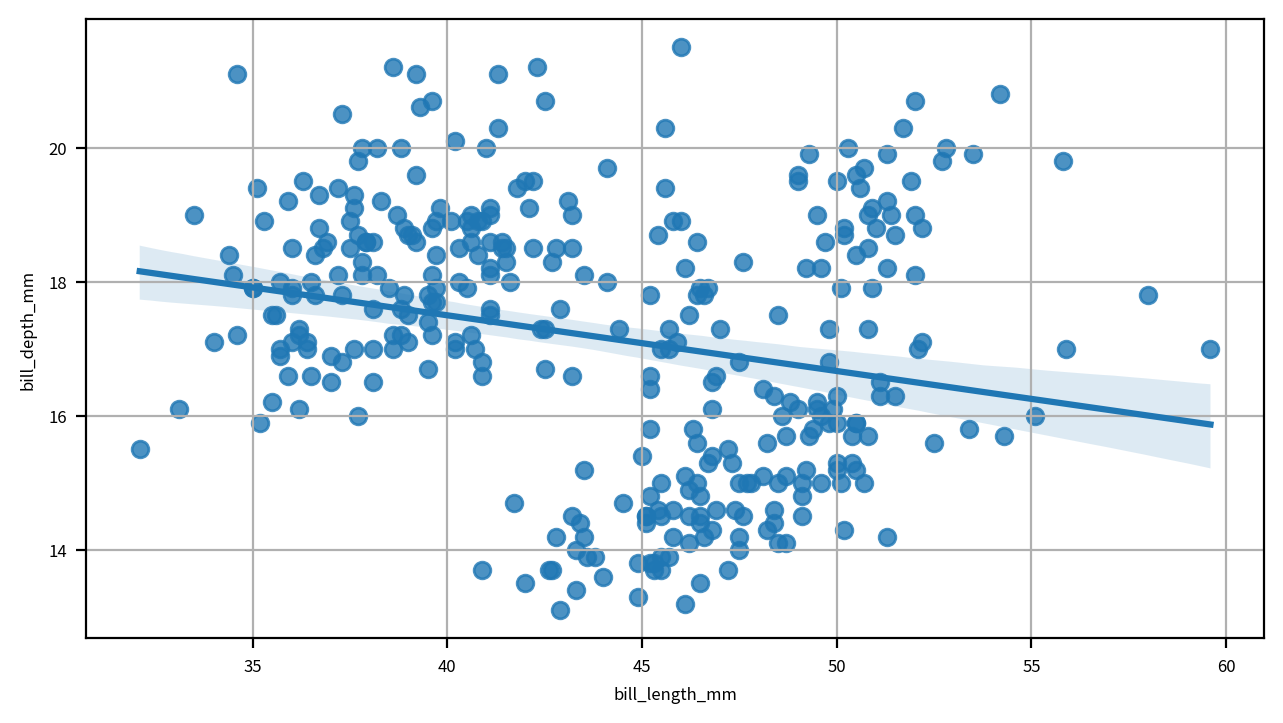

In [6]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Regplot Plot 그래프 그리기
# 아래의 파라미터들 추가 시 줄 수 있는 효과:
    # 'fit_reg = False': 추세선 제거 -> scatterplot과 같아짐
    # 'scatter = False': 산점도 제거 -> lineplot과 같아짐
# .scatterplot()은 hue 파라미터를 적용해서 범주에 따른 구분을 시각화 가능
# but❗ .regplot()은 hue 파라미터를 지원 안한다 ㅠㅠ
sb.regplot(data = origin, x = 'bill_length_mm', y = 'bill_depth_mm')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #03. LmPlot

- = RegPlot + ScatterPlot
- 장점: **여러 범주를 기준으로 행,열 나눠(facet) 비교 가능!**
  - by: 색(hue), 행(row), 열(col) 옵션을 통해 **그룹 간 관계 차이** 를 시각화
- when? 관계 패턴을 다양한 하위집단(subplot)으로 세분해야할 때
  - i.e. 성별/지역/연도 등 2개 이상의 범주를 적용, 그룹화 하여 회귀선을 비교하고 싶을 때

### 1. 기본 사용 방법

>  그래프 작성 코드가 기존 그래프들이랑은 좀 다름

기본 파라미터는 .regplot()과 동일

but `hue` 파라미터를 지원함!! (.regplot()에선 지원 안했음)

-> by: regplot 시각화 코드에서 hue 추가 및 

하위 집단들의 산점도 그래프들에 추세선 추가

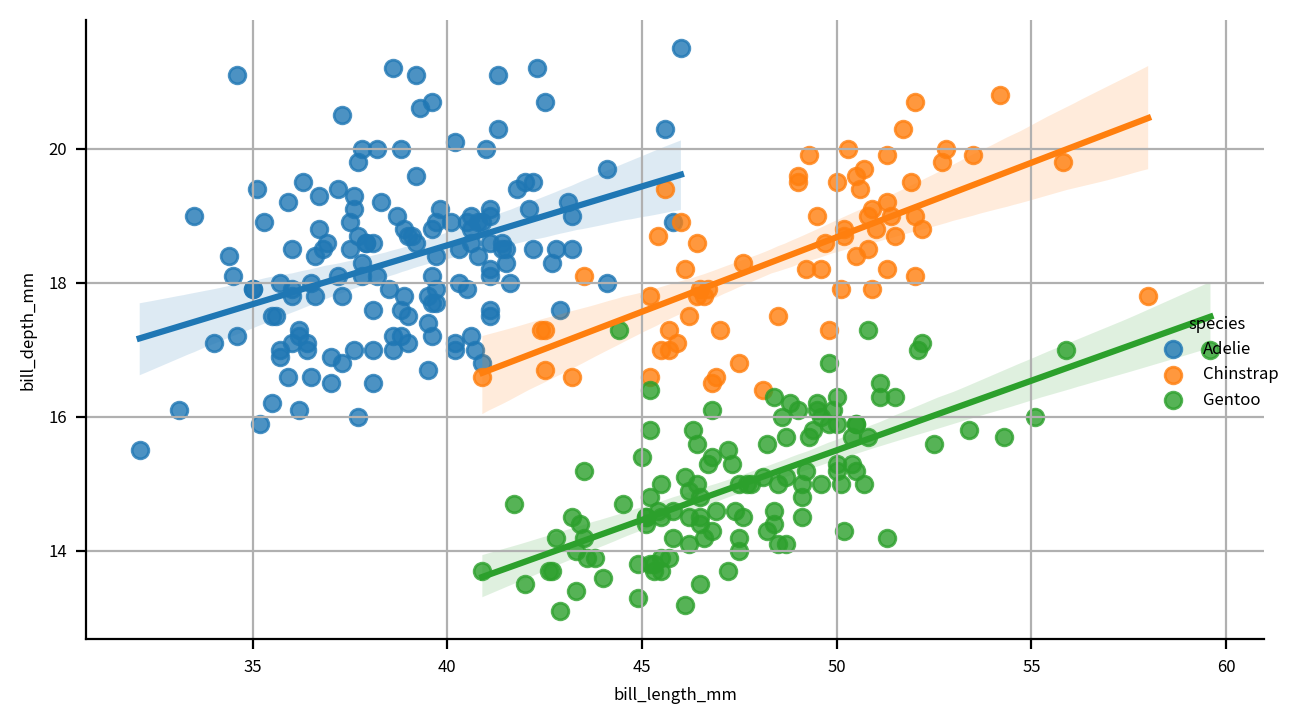

In [8]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
#rows = 1 없어짐             # 그래프 행 수
#cols = 1 없어짐             # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
#fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi) 없어짐


# 2) Lm Plot 그래프 그리기
# 하위 집단이 여러개 이므로 그래프 꾸미기가 필요
    # -> .lmplot() 메서드로부터 리턴되는 객체 ('g')를 활용해야함
g = sb.lmplot(data = df, hue = 'species', x = 'bill_length_mm', y = 'bill_depth_mm')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# 3) 그래프 꾸미기: 
#ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 2. 조건 별 병렬 시각화 원할 때

범주에 따라 구분 후 하위 변수를 사용해서 그래프를 병렬로 분할하는 방법

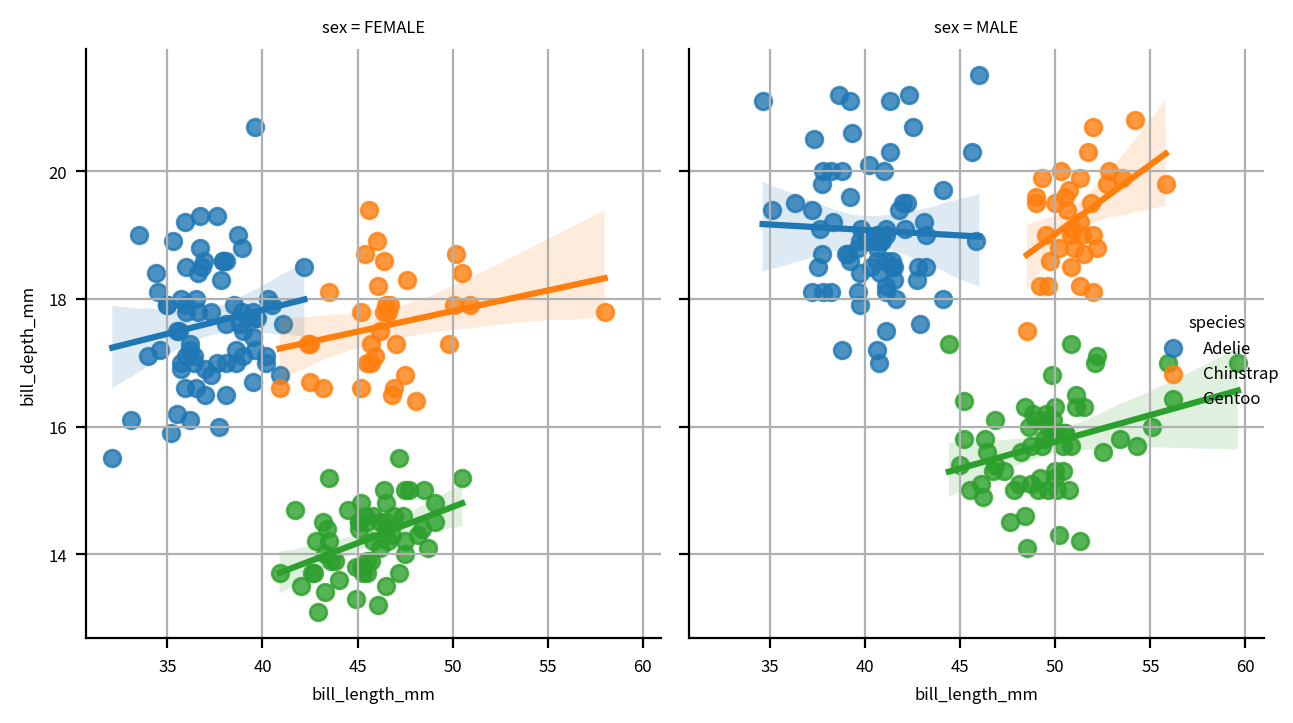

In [9]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
#rows = 1 없어짐             # 그래프 행 수
#cols = 1 없어짐             # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
#fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi) 없어짐


# 2) Lm Plot 그래프 그리기
g = sb.lmplot(data=df, col='sex', hue='species', x='bill_length_mm', y='bill_depth_mm')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
#plt.grid()

# 위에 코드 대신 각 subplot에 grid 표시하기
for ax in g.axes.flatten():
    ax.grid(True)

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 3. 모든 조건에 따라 행,열로 분할

row, col 파라미터 사용함

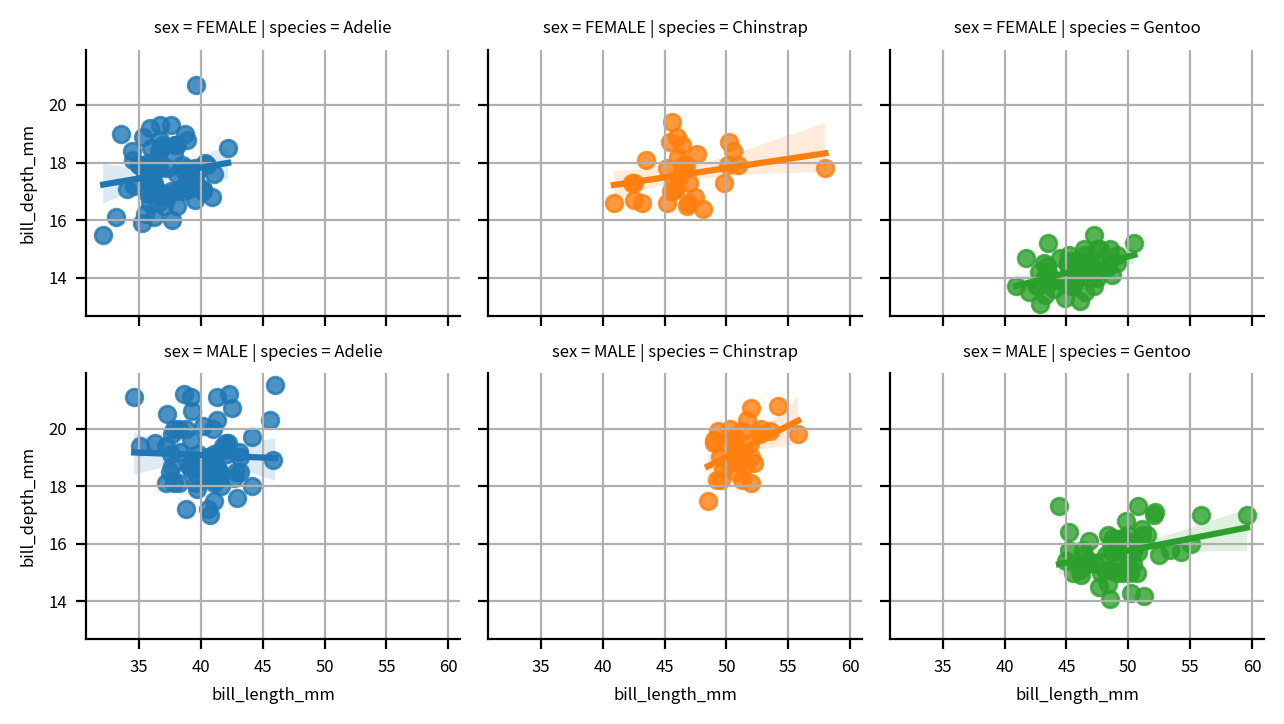

In [10]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Lm Plot 그래프 그리기
g = sb.lmplot(data=df, row = 'sex', col='species', hue='species', x='bill_length_mm', y='bill_depth_mm')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 각 subplot에 grid 표시하기
for ax in g.axes.flatten():
    ax.grid(True)

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #04. PairPlot (산점도 행)

- 모든 변수에 대한 교차 분석
- 전체 데이터 구조랑 변수 간 상관관계를 한눈에 파악 가능
- 대각선 도표: 데이터의 주변 분포를 표시하기 위한 일변량 분포 도표
  - KDE 또는 Histogram이 그려짐
- when? EDA에서 초기 전반적인 스캔용으로 유용하게 쓰임
  - **전체 변수들 끼리 서로 어떤 관계가 있을지** 한번에 파악하는 용도
- 단점: 처리속도 개느림

### 1. pairplot 기본형:

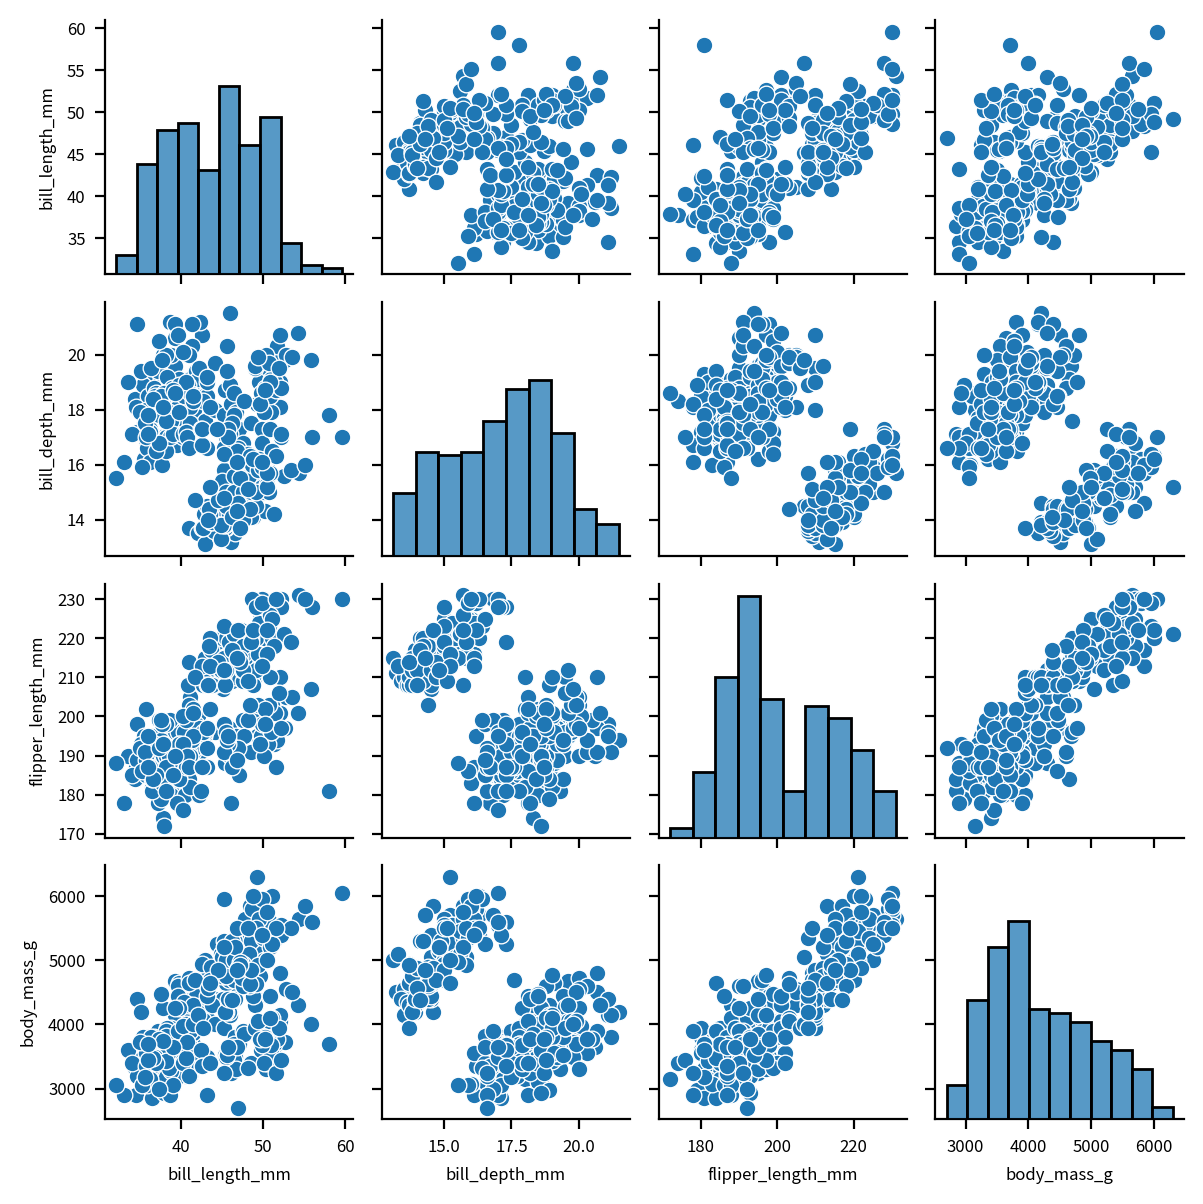

In [11]:
# 1) 그래프 초기화
width_px = 1200             # width랑 height pixcel 값 일치시키기
height_px = 1200             
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair Plot 그래프 그리기
    # 'corner = True' 파라미터 추가 시 대각선 아래 subplot들만 표시된다
g = sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 2. pairplot 범주 별 구분형:

(1) by: **hue** 파라미터 적용

(대각선 도표가 KDE로 변경됨)

∵ `hue` 파라미터에 변수 할당하면 hue에 의미론적 매핑이 추가되기 때문!

그리고, 대각선 주변 플롯들이 **색으로 계층화 된 KDE로 바뀜!!**

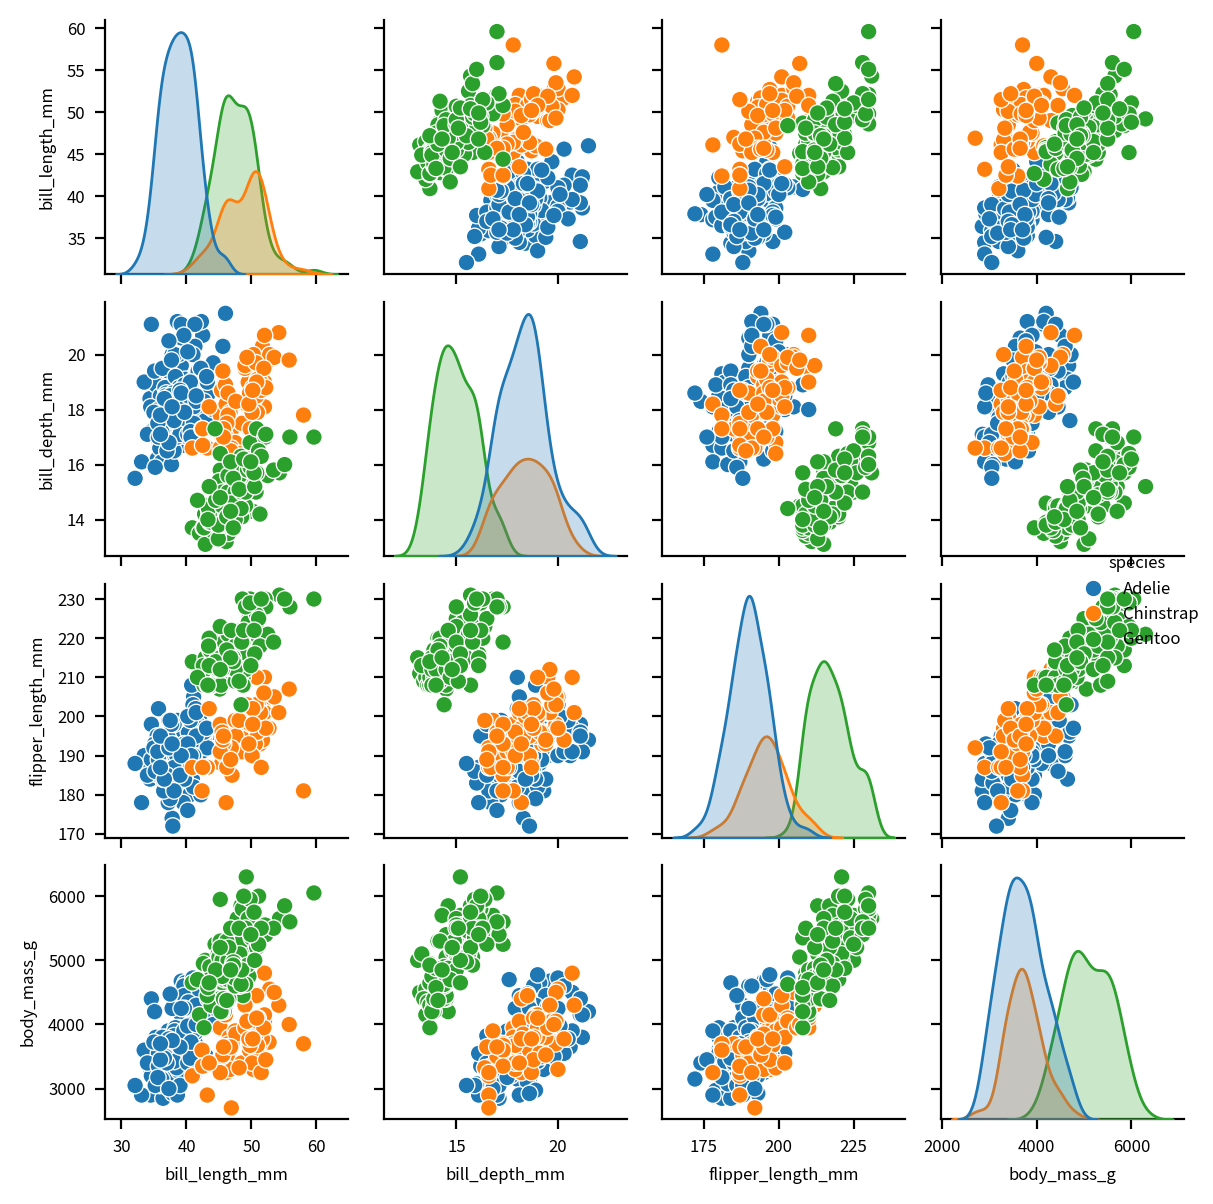

In [12]:
# 1) 그래프 초기화
width_px = 1200             # width랑 height pixcel 값 일치시키기
height_px = 1200             
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair Plot 그래프 그리기
    # 'diag_kind' 파라미터에 'hist'값 적용ㄱ
    # -> 'diag_kind'에 적용 가능한 값: 'kde'(기본값), 'hist', 'auto'
g = sb.pairplot(df, hue = 'species', diag_kind = 'kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 3. 보고자 하는 변수들만 **선별** 하고자 할 때:

`x_vars` 파라미터와 `y_vars` 파라미터에 원하는 변수를 **리스트 타입**으로 지정하면 됨:

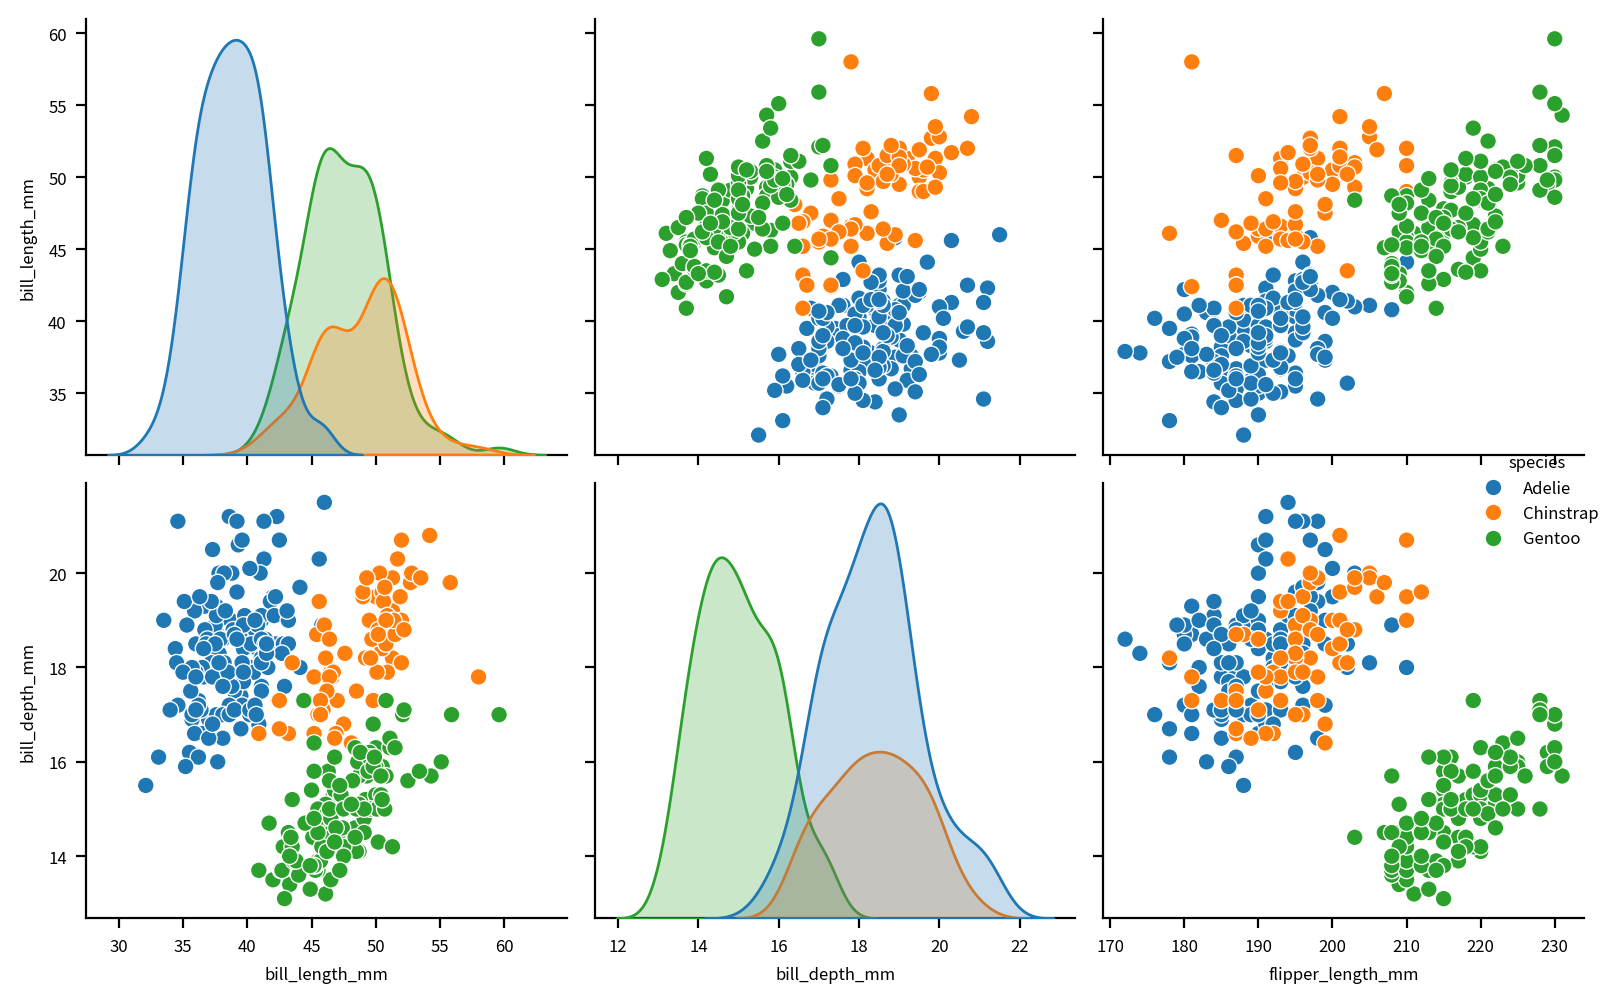

In [13]:
# 1) 그래프 초기화
width_px = 1600             # 그래프 가로
height_px = 1000            # 그래프 세로             
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair Plot 그래프 그리기
g = sb.pairplot(
    df, hue = 'species', diag_kind = 'kde',
    x_vars = ['bill_length_mm', 'bill_depth_mm', "flipper_length_mm"],
    y_vars = ['bill_length_mm', 'bill_depth_mm']
    )
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 4. 데이터를 그룹별로 묶어서 표시 원할 때:

`.pairplot()` 메서드가 리턴하는 객체를 받아서 `.map_lower()` 메서드 호출하는 방법 적용

- `.map_lower()`에 다른 종류의 함수 이름 적용하면 대각선 기준으로 서로 다른 종류의 시각화 결과물(지역화 된 pairplot)을 나타낼 수 있음

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarn

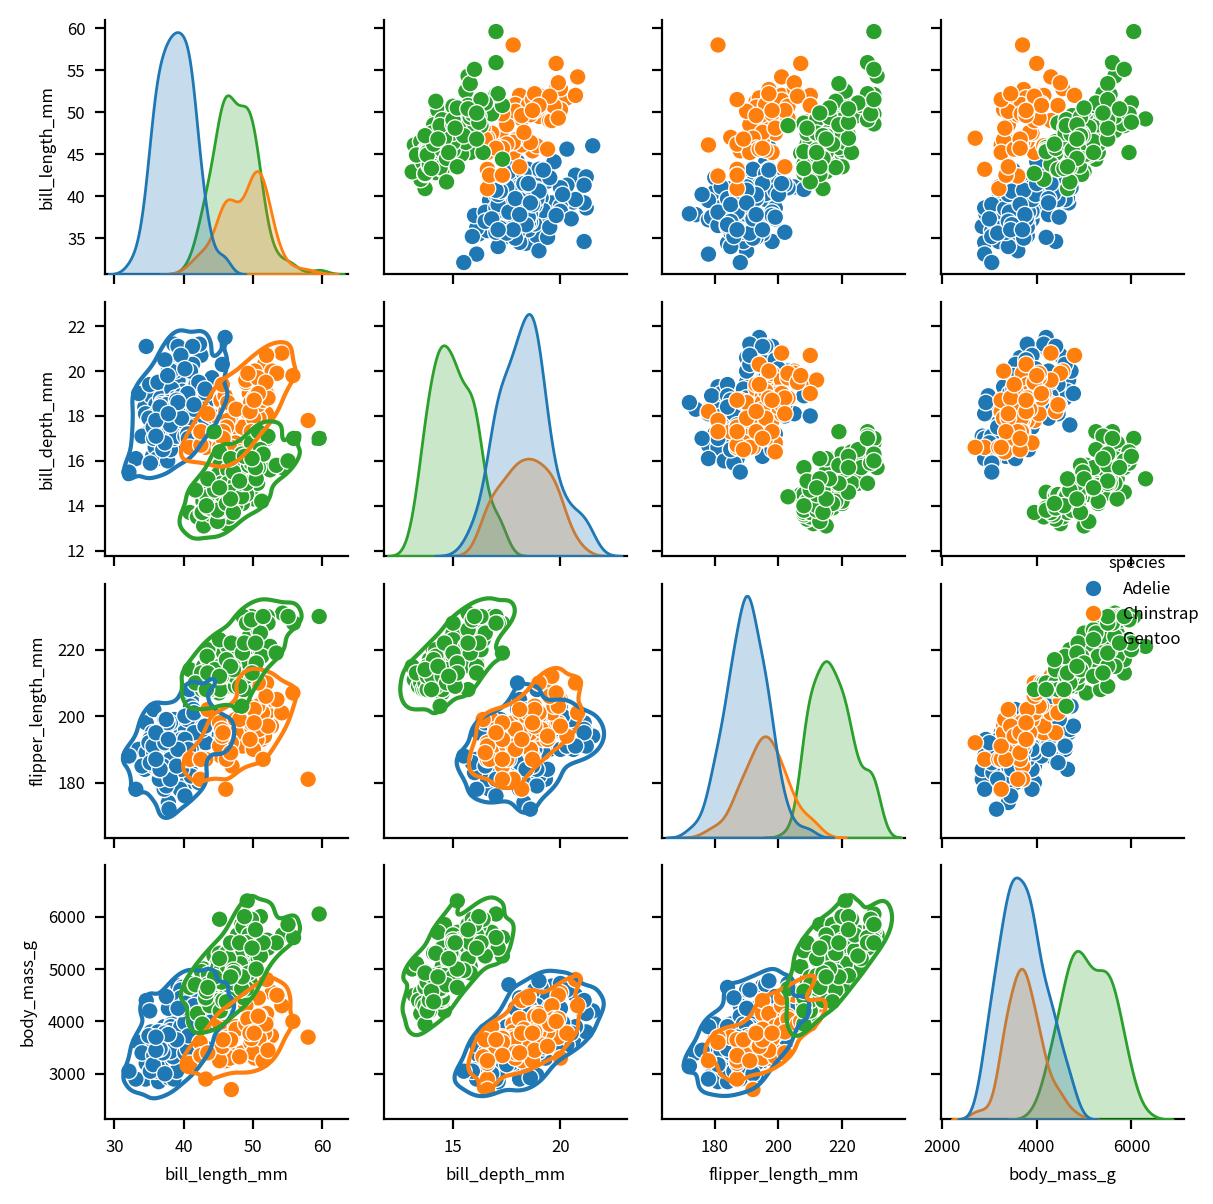

In [14]:
# 1) 그래프 초기화
width_px = 1200             # width랑 height pixcel 값 일치시키기
height_px = 1200             
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair Plot 그래프 그리기
g = sb.pairplot(df, hue = 'species')
g.map_lower(sb.kdeplot, levels = 1, colors = 0.2)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료